In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('mtfuji_data.csv')
df.head()

x        lat         lng  elevation  distance
0  0  35.134141  139.132082        0.0         0
1  1  35.135826  139.129202        0.0       322
2  2  35.137510  139.126322        0.0       644
3  3  35.139194  139.123441        0.0       966
4  4  35.140878  139.120560        0.0      1288

## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。  
横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

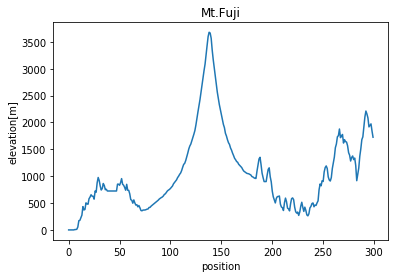

In [4]:
plt.plot(df.x, df.elevation)
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]');

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。  
しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。  
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。  
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [5]:
def grad(df, position):
    gradient = (df.elevation[position] - df.elevation[position-1])
    return gradient

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。  
数式で表すと 「移動先の地点 = 今いる地点 - α×今いる地点の勾配」となります。  
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。  
αは0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。  
この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [35]:
def move_position(df, position, alpha=0.2):
    new_position = position - alpha * grad(df, position)
    return round(new_position)

In [36]:
move_position(df, 136)

102.0

## 【問題4】山を下る関数の作成
山を下る関数を作成してください。  
最初の地点を受け取り、問題3の関数によって地点を更新していきます。  
移動毎の地点はリストなどに記録して、これを関数の返り値としてください。  
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59\[m\]）とします。ここから山を下っていきましょう。

In [38]:
def kudaru(df, position):
    position_list = [position]
    for _ in range(20):
        last_x = position
        position = move_position(df, position, alpha=0.2)
        if last_x == position:
            break
        position_list.append(position)
    return position_list

In [39]:
kudaru(df, 170)

[170,
 174.0,
 177.0,
 178.0,
 180.0,
 186.0,
 164.0,
 169.0,
 173.0,
 176.0,
 177.0,
 178.0,
 180.0,
 186.0,
 164.0,
 169.0,
 173.0,
 176.0,
 177.0,
 178.0,
 180.0]

## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

[136, 102.0, 98.0, 95.0, 93.0, 89.0, 85.0, 82.0, 79.0, 73.0]


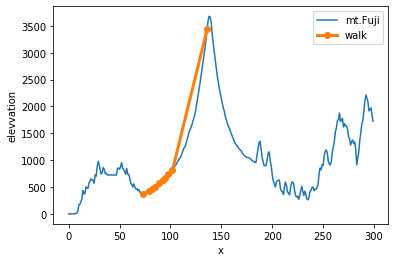

In [43]:
position_list = [136]
for _ in range(1000):
    new_position = move_position(df, position_list[-1], alpha=0.2)
    if new_position >=300:
        position_list.append(300)
        break
    elif new_position < 1:
        position_list.append(0)
        break
    if df.elevation[new_position] >= df.elevation[position_list[-1]]:
        break
    position_list.append(new_position)
print(position_list)

plt.xlabel('x')
plt.ylabel('elevvation')
plt.plot(df.x, df.elevation, label='mt.Fuji')
plt.plot(df.elevation[df['x'].isin(position_list)], 'o-', lw=3, label='walk')
plt.legend();

## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。  
そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。  
機械学習においては 初期値をどう設定するかが結果に影響を与えることが確認できます。

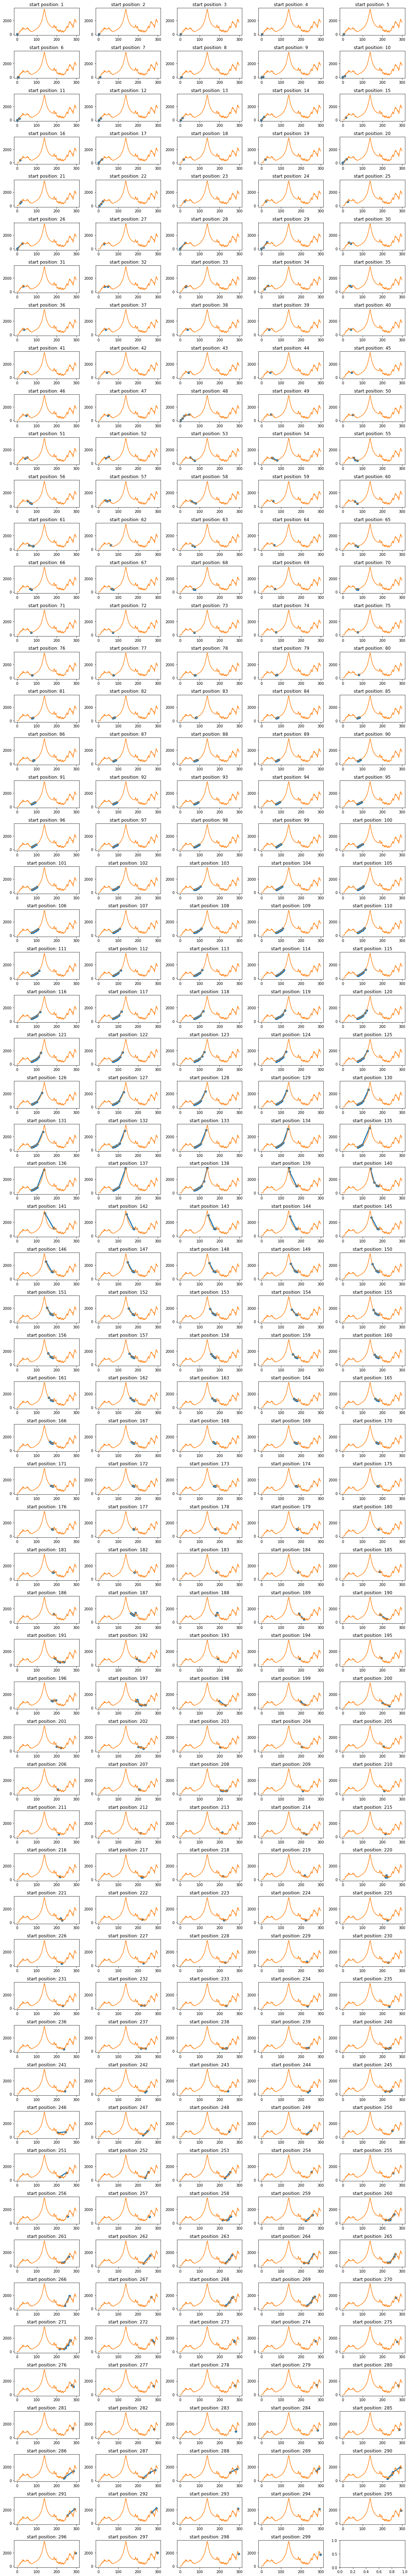

In [48]:
fig, ax = plt.subplots(60, 5, figsize=(16, 100))

first_positions = np.arange(1, 300)
for i, first_position in enumerate(first_positions):
    position_list = [first_position]
    for _ in range(20):
        new_position = move_position(df, position_list[-1], alpha=0.2)
        if new_position >= 300:
            position_list.append(300)
            break
        elif new_position < 1:
            position_list.append(0)
            break
        if df.elevation[new_position] >= df.elevation[position_list[-1]]:
            break
        position_list.append(new_position)
    row = i // 5
    col = i % 5
    ax[row][col].plot(df.elevation[df['x'].isin(position_list)], 'o-', lw=3, label='walk')
    ax[row][col].plot(df.x, df.elevation, label='mt.Fuji')
    ax[row][col].set_title('start position: {}'.format(i+1))
    #ax[row][col].legend()
plt.tight_layout();

## 【問題7】ハイパーパラメータ の変更
ハイパーパラメータαを変化させるとどのような下山過程となるか、問題5のように可視化してください。  
そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

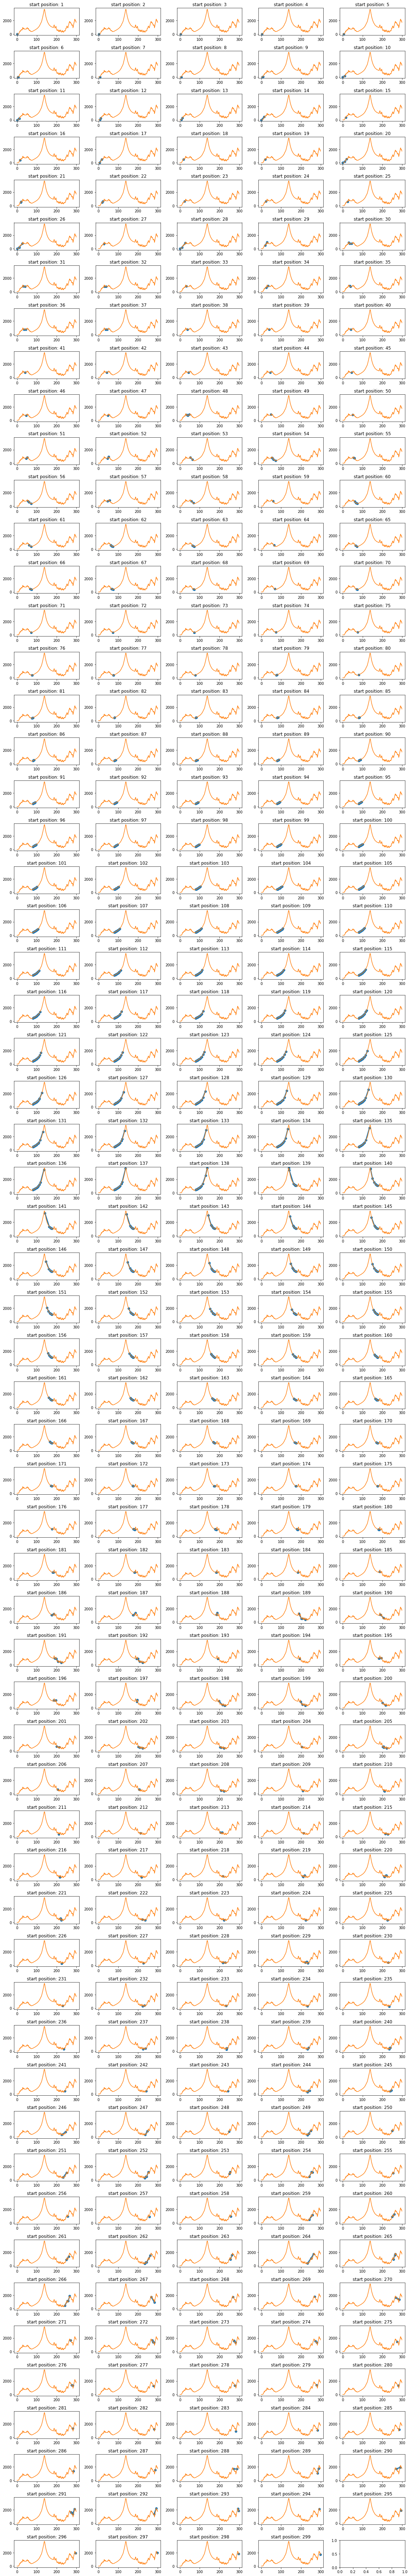

In [49]:
#alpha=0.1
fig, ax = plt.subplots(60, 5, figsize=(16, 100))

first_positions = np.arange(1, 300)
for i, first_position in enumerate(first_positions):
    position_list = [first_position]
    for _ in range(20):
        new_position = move_position(df, position_list[-1], alpha=0.1)
        if new_position >= 300:
            position_list.append(300)
            break
        elif new_position < 1:
            position_list.append(0)
            break
        if df.elevation[new_position] >= df.elevation[position_list[-1]]:
            break
        position_list.append(new_position)
    row = i // 5
    col = i % 5
    ax[row][col].plot(df.elevation[df['x'].isin(position_list)], 'o-', lw=3, label='walk')
    ax[row][col].plot(df.x, df.elevation, label='mt.Fuji')
    ax[row][col].set_title('start position: {}'.format(i+1))
    #ax[row][col].legend()
plt.tight_layout();

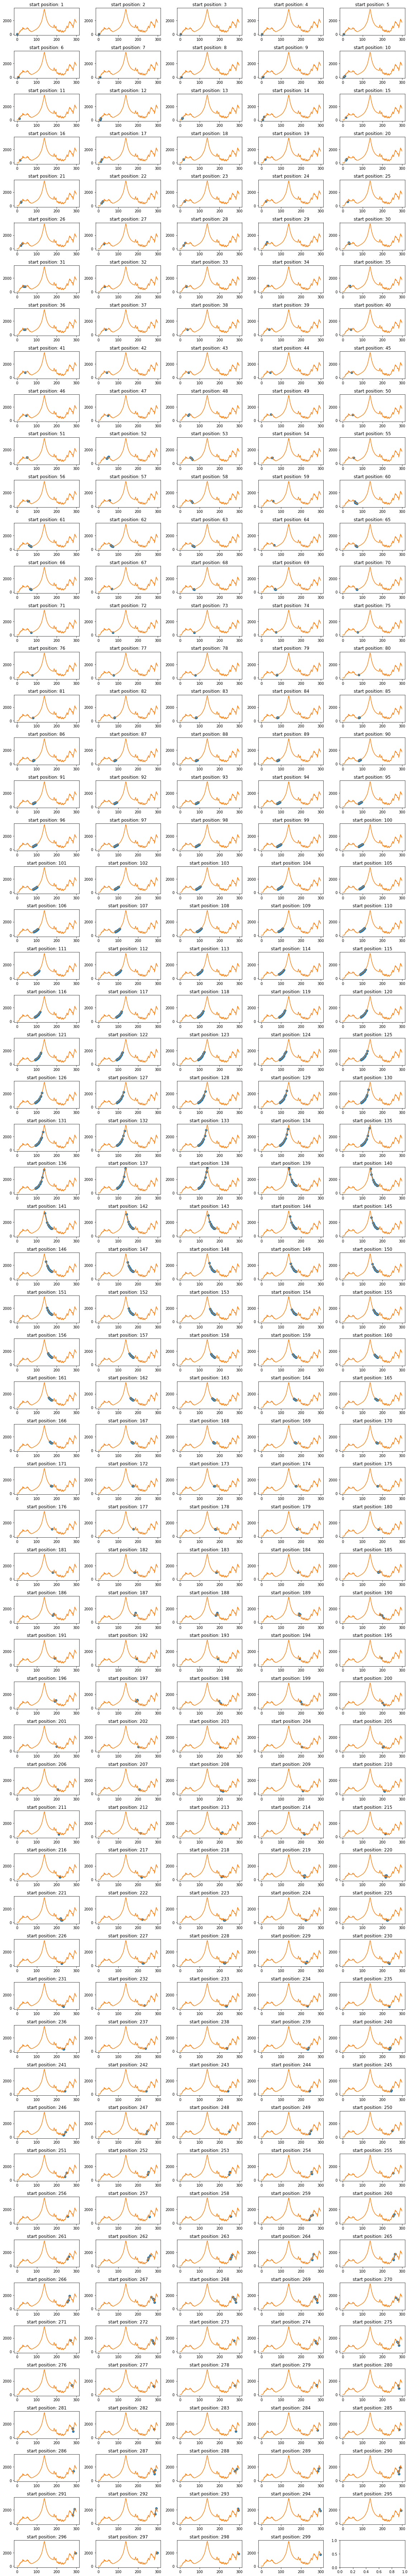

In [50]:
#alpha=0.05
fig, ax = plt.subplots(60, 5, figsize=(16, 100))

first_positions = np.arange(1, 300)
for i, first_position in enumerate(first_positions):
    position_list = [first_position]
    for _ in range(20):
        new_position = move_position(df, position_list[-1], alpha=0.05)
        if new_position >= 300:
            position_list.append(300)
            break
        elif new_position < 1:
            position_list.append(0)
            break
        if df.elevation[new_position] >= df.elevation[position_list[-1]]:
            break
        position_list.append(new_position)
    row = i // 5
    col = i % 5
    ax[row][col].plot(df.elevation[df['x'].isin(position_list)], 'o-', lw=3, label='walk')
    ax[row][col].plot(df.x, df.elevation, label='mt.Fuji')
    ax[row][col].set_title('start position: {}'.format(i+1))
    #ax[row][col].legend()
plt.tight_layout();